# OkCoin API Note

In [1]:
# 导入所需库
import urllib
import requests
import json
import copy

In [18]:
# API 地址
url = 'http://api.huobi.com/staticmarket/depth_btc_json.js'
# 'https://www.okcoin.cn/api/v1/depth.do?symbol=btc_usd'

In [19]:
# 读取 API ，相当于 Get
data = urllib.request.urlopen(url).read().decode()

In [20]:
# 用 json 格式化文本，data1 为字典类型
data1 = json.loads(data)

In [26]:
data1.

dict_items([('bids', [[6805, 0.1026], [6804, 0.5], [6800, 0.2412], [6795, 0.3381], [6787.1, 1.8961], [6785, 0.3964], [6781.75, 0.0053], [6780.5, 0.131], [6780.1, 4], [6780, 64.181], [6776.44, 0.0029], [6776.28, 0.86], [6775.5, 5], [6775.01, 5.1255], [6774.4, 1], [6771.1, 1.3363], [6770.01, 0.2008], [6770, 0.21], [6768, 1.0667], [6767, 0.2774], [6766.66, 1], [6766, 0.0285], [6765, 0.524], [6764.2, 2], [6760.01, 1.3927], [6760, 0.3579], [6758, 1.4341], [6755, 0.1], [6753.3, 0.3], [6753, 0.5], [6751.01, 1.6202], [6751, 0.2588], [6750.1, 0.0504], [6750.04, 2], [6750.01, 0.4756], [6750, 35.4818], [6748.6, 2], [6746, 0.0151], [6745.42, 2], [6745, 2.643], [6744.43, 0.909], [6744, 1.315], [6742.03, 1.255], [6741.68, 1], [6741.04, 1.242], [6740.45, 0.5], [6740.01, 0.4066], [6740, 8.11], [6739, 0.912], [6738, 11.1486], [6737.75, 0.12], [6737.65, 8.391], [6737, 0.2913], [6736, 0.5], [6735.82, 0.0129], [6734, 0.001], [6732, 0.0148], [6731, 0.1486], [6730.97, 0.03], [6730.87, 1.52], [6730, 3.1189],

In [6]:
def get_sell_cost():
    moneys, btcs = 50000, 0
    for i in range(0,len(data1['bids'])):    
        if moneys - data1['bids'][i][0] * data1['bids'][i][1] <= 0:
            costs = 50000/(btcs + moneys/data1['bids'][i][0])
            return(costs)
            break
        else:
            moneys = moneys - data1['bids'][i][0] * data1['bids'][i][1]
            btcs = btcs + data1['bids'][i][1]

In [7]:
def get_buy_cost():
    moneyb, btcb = 50000, 0
    for i in range(len(data1['asks'])-1,-1,-1):
        if moneyb - data1['asks'][i][0] * data1['asks'][i][1] <= 0:
            costb = 50000/(btcb + moneyb/data1['asks'][i][0])
            return(costb)
            break
        else:
            moneyb = moneyb - data1['asks'][i][0] * data1['asks'][i][1]
            btcb = btcb + data1['asks'][i][1]

In [9]:
import pandas as pd

In [10]:
data=pd.read_table('/home/wangshi/reports/profit_records',sep='\s+')

In [11]:
data.tail()

,datetime,for10000,for50000
3447,20170212103802,-12.36,-83.98
3448,20170212103902,-19.15,-180.58
3449,20170212104001,-33.72,-219.25
3450,20170212104101,-47.84,-250.42
3451,20170212104301,-57.82,-308.03


In [12]:
import matplotlib.pyplot as plt

In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/wangshi/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


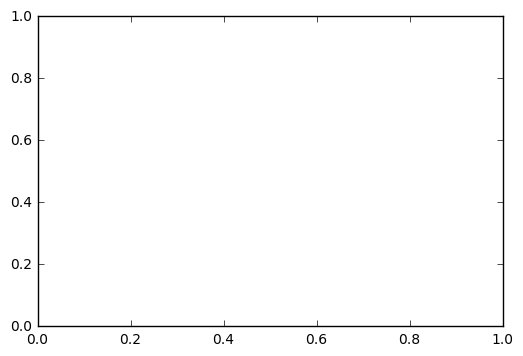

In [14]:
fig= plt.figure()
ax = fig.add_subplot(1,1,1)


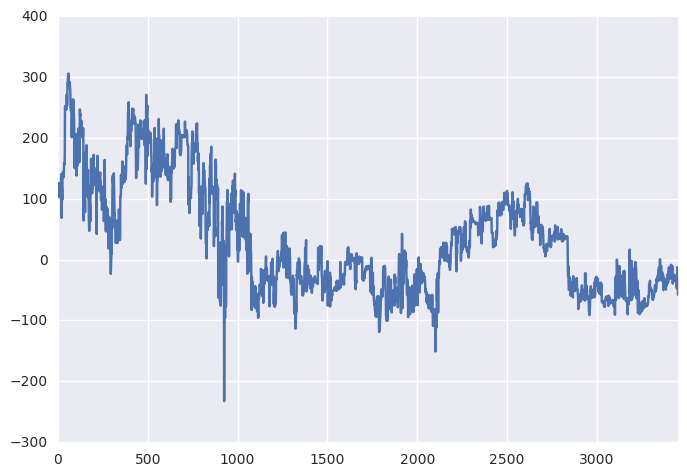

In [16]:
import seaborn as sns
sns.set(style="darkgrid")

# Load the long-form example gammas dataset
gammas = sns.load_dataset("gammas")

# Plot the response with standard error
sns.tsplot(data=data['for10000'])

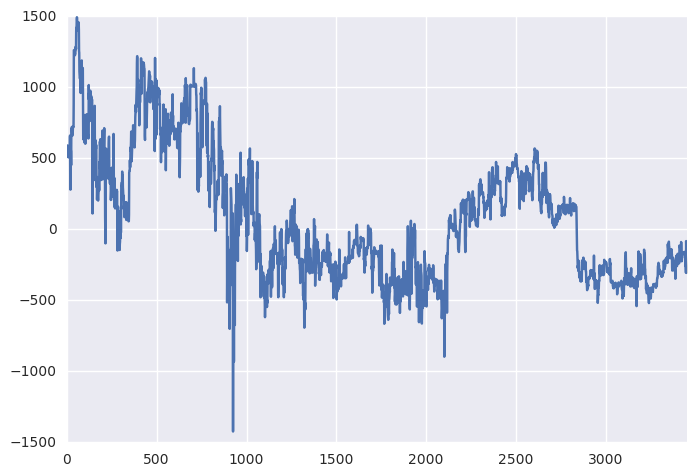

In [17]:
import seaborn as sns
sns.set(style="darkgrid")

# Load the long-form example gammas dataset
gammas = sns.load_dataset("gammas")

# Plot the response with standard error
sns.tsplot(data=data['for50000'])